## The Perceptron Algorithm

Developed by Frank Rosenblatt 1958 at Cornell University it paved the way for modern neural networks.
Inspired by the human brain and how neurons work he developed the Perceptron.  Single Layer neural Newtwork capable of
linear binary classification. In this post we are going to take a deep dive into Perceptron and the Math behind the fundamental building block of modern neural Network
(aka. Multilayer-Perceptrons).

Starting out we are going to take a look at linearity as a fundamental property in Linear Algebra:

**A function is considered linear if it satisfies two main properties**:

Additivity: $f(x,y) = f(x) + f(y)$

Homogenity: $f(a * x) = a * f(x)$


**Linear Transformations (Linear Maps)**:

For Example $f: \mathbb{R}^N \to \mathbb{R}, \quad f(x_1, x_2, \dots, x_N) = y$

From 3Blue1Brown: "If you take a line of evenly spaced dots from the input space and perform a linear transformation on that line
the output on the Number line (output space) are still evenly spaced. If this is not the case the transformation is non-linear."

More formally above stated characteristics hold.

So generally speaking a linear transformation "preserves the structure of the Vector Space" (A Programmers Introduction to Mathematics, Jeremy Kun).
Applieng a linear Map on arbitrary data will preserve the relations in the Data!!! 

Because this is such a fascinating property I am going to "prove" it technically.


In [8]:
# linearity is so FASCINATING. let's consider an example of How the structure of the Data stays in place after a Linear Transformation

import math
import random


# define the euclidian distance between two points from arbitrary dimensions
def euclidean(a : list[int], b : list[int]) -> float:
     e_dis = 0
     for x in range(len(a)):
          e_dis += pow(a[x] - b[x], 2)

     return math.sqrt(e_dis)

# for an arbitrary Linear map: R^3 -> R
def create_random_lin_map(dimensions: int) -> list[int]:
     lin_map = []
     for _ in range(dimensions):
          lin_map.append(random.randint(0,9))
     
     return lin_map

def create_random_data(dimensions: int, tuple_count) :
     rand_data = []
     
     for _ in range(tuple_count):
          new_tuple = []
          for _ in range(dimensions):
               new_tuple.append(random.randint(0,9))
     
     return rand_data

def lin_map_apply(map : list[int], data) -> int:
     if len(map) != len(data): raise Exception("Dimensions to not fit")

     linear_combination = 0
     for x in range(map):
          linear_combination += map[x] * data[x]

     return linear_combination

def transform_data(data , map):
     transformed_data = []
     for x in range(len(data)):
          transformed_data.append(lin_map_apply(map, data[x]))
     return transformed_data

def test_structure_is_preserved(original_data, transformed_data) -> bool:
     dis_original = []
     dis_transformed = []
     for x in range(len(original_data)):
          for y in range(len(original_data)):
               dis_original.append(euclidean(original_data[x], original_data[y]))
               dis_transformed.append(euclidean(transformed_data[x], transformed_data[y]))
     
     for x in range(len(dis_original)):
          if dis_original[x] != dis_transformed[x]:
               return False
     
     return True
          


random_data_three_dimensions = create_random_data(3, 10)
lin_map_three_to_one = create_random_lin_map(3)
transformed_data = transform_data(random_data_three_dimensions, lin_map_three_to_one)

output = test_structure_is_preserved(random_data_three_dimensions, transformed_data=transformed_data)
print(output)

random_5_dim_data = create_random_data(5, 10)
lin_map_five_to_one = create_random_lin_map(5)
transformed_data_2 = transform_data(random_5_dim_data, lin_map_five_to_one)
output2 = test_structure_is_preserved(random_5_dim_data, transformed_data_2)
print(output2) 


True
True


Given this Property of linear map


# Now let's actually look at the algorithm:

We want to find a function (linear map!!!) so we can devide the Input space (the data) into two halfspaces because it is a binary classification.

**Half-Spaces** (definition taken from Wikipedia):
More generally, a half-space is either of the two parts into which a hyperplane divides an affine space. That is, the points that are not incident to the hyperplane are partitioned into two convex sets (i.e., half-spaces), such that any subspace connecting a point in one set to a point in the other must intersect the hyperplane.

To vizualize a convex set:

<img src="images/Convex_Set.png" alt="Convex Set" width="300"/>


Overview of the perceptron:

<img src="images/perceptron.png" alt="Convex Set" width="700"/>


The goal here is to learn a 1 by N+1  matrix to that performs a linear transformation of the input vector $\mathbb{R}^N$ to the correct halfspace that gets defined by the 
parameters (w, b). 

For a more "functual" definition out algorithm wants to find a function y that transforms a vector onto ${-1,1}$
where f is the nonlinear activation function phi is the input vector and w our matrix (Definition taken from Bishop):
$$
y(x) = f(w^T \varphi(x))
$$

In [10]:
# lets define some data points these datapoints will come from R^2
x = [1, 2, 3, 1, 3,   7,8, 9, 8, 7]
y = [1,2, 3, 1.5, 1,   8, 7, 9, 8, 7]

data = list(zip(x, y))
print(data)

[(1, 1), (2, 2), (3, 3), (1, 1.5), (3, 1), (7, 8), (8, 7), (9, 9), (8, 8), (7, 7)]


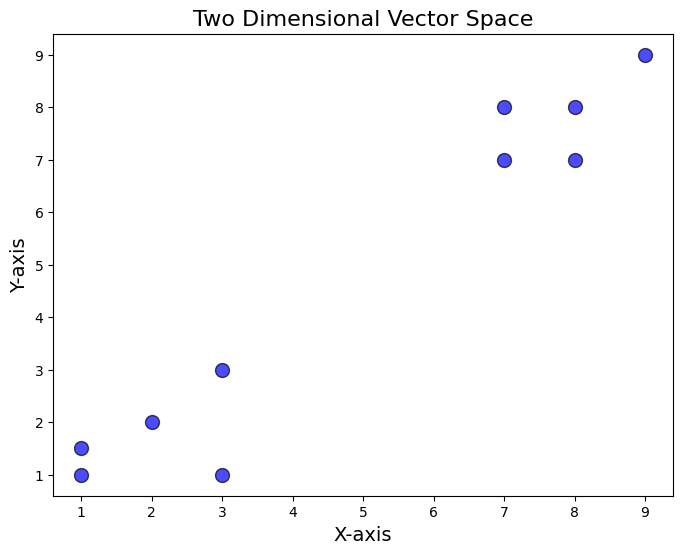

In [3]:
# lets vizualize the data
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', s=100, alpha=0.7, edgecolors='black')

# Add titles and labels
plt.title('Two Dimensional Vector Space', fontsize=16)
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)

# Show the plot
plt.show()


We can see that this is clearly linearly seperable. Hence we can find a function that devides the Input space into two convex sets.
Now let's actually write the algorithm:

In [11]:
# perceptron algorithm after Rosenblatt (1958)

# labeling of the data because it is a SUPERVISED Algorithm
labeled_data = []
for idx, (x, y) in enumerate(data):
     if x + y > 10:
          labeled_data.append([x, y, 1])
     else:
          labeled_data.append( [x, y, -1])
     

print(labeled_data)

[[1, 1, -1], [2, 2, -1], [3, 3, -1], [1, 1.5, -1], [3, 1, -1], [7, 8, 1], [8, 7, 1], [9, 9, 1], [8, 8, 1], [7, 7, 1]]


we are gonna now write the following Algorithm:

<img src="images/Algorithm.png" alt="Convex Set" width="600"/>

The goal of this algorithm is to find a vector (one dimensional Matrix) w such that $$W^\top \phi(x_n) > 0$$ for tuples in Class one
and $$W^\top \phi(x_n) < 0$$ in tuples for Class Two. We will denote these two classes as 1 and -1.

Now for both classes: $$W^\top \phi(x_n) t_n > 0$$

We define the Perception Criterion as :

$$E_P(w) = - \sum_{n \in M} w^\top \phi_n t_n$$


So the Neuron actually learns we are going to propagate the classification results back in order to update the function parameters.
We will do this using gradient descent.







In [ ]:
import random

def activation(input) -> int:
    return 1 if input >= 0 else -1

def classify(parameters, data) -> int:
    linear_combination = sum(parameters[x] * data[x] for x in range(len(parameters)))
    return activation(linear_combination)


def stochastic_gradient_descent(learning_rate, old_params, example):
     features = example[:-1]  
     target = example[-1]  
     prediction = classify(old_params, features)

     if prediction == target:
          return old_params

     new_params = []
     for x in range(len(old_params)):
          new_params[x] = old_params[x] - (learning_rate * example[x])

     return new_params

def choose_random():
     rand = random.randint(0, len(labeled_data) -1)
     return labeled_data[rand] 


# Perceptron algorithm with stochastic gradient descent
def perceptron_algorithm(learning_rate, start_vector: list) -> list[float]:
    print(f"Starting Perception Algorithm with parameters: {start_vector} and learning rate: {learning_rate}")
    parameters = start_vector.copy()
    iteration = 0
    max_iterations = 2000  # To prevent infinite loops in case of non-linearly separable data

    while iteration < max_iterations:
          correctly_classified = 0

          for example in labeled_data:
               features, label = example[:-1], example[-1]
               if classify(parameters, features) == label:
                    correctly_classified += 1  

          if correctly_classified == len(labeled_data):
               break
          else:
               rand_example = choose_random()
               parameters = stochastic_gradient_descent(learning_rate, parameters, rand_example)  

          iteration += 1
          print(f"Parameters after {iteration} iteration(s): {parameters} correctlly classified: {correctly_classified}")

    return parameters

# Run the perceptron algorithm
params = perceptron_algorithm(1, [2, 4])
print(f"Final parameters: {params}")


Starting Perception Algorithm with parameters: [2, 4] and learning rate: 1
Parameters after 1 iteration(s): [2, 4] correctlly classified: 3
Parameters after 2 iteration(s): [0, 2] correctlly classified: 3
Parameters after 3 iteration(s): [0, 2] correctlly classified: 3
Parameters after 4 iteration(s): [-2, 0] correctlly classified: 3
Parameters after 5 iteration(s): [2, 2] correctlly classified: 1
Parameters after 6 iteration(s): [2, 2] correctlly classified: 3
Parameters after 7 iteration(s): [2, 2] correctlly classified: 3
Parameters after 8 iteration(s): [2, 2] correctlly classified: 3
Parameters after 9 iteration(s): [0, 0] correctlly classified: 3
Parameters after 10 iteration(s): [2, 2] correctlly classified: 2
Parameters after 11 iteration(s): [2, 2] correctlly classified: 3
Parameters after 12 iteration(s): [0, 0] correctlly classified: 3
Parameters after 13 iteration(s): [0, 0] correctlly classified: 2
Parameters after 14 iteration(s): [0, 0] correctlly classified: 2
Parameter